## BÀI TẬP

In [5]:
# Cài đặt thư viện scipy
# !pip install scipy 
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [7]:
# PHÂN PHỐI NHỊ THỨC : 
# a.Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.
n, p = 10, 0.25
binom.rvs(n, p, size=10)

array([4, 4, 2, 5, 2, 3, 1, 3, 2, 2], dtype=int64)

In [8]:
# b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm
# X (BNN rời rạc) = câu đúng => 10 - X = câu sai
# 4X - 2(10 - X) = 4 => X = 4 => P(X = 4)
binom.pmf(4,n,p)

0.14599800109863273

In [9]:
# c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)
ex = 0
for x in range(0, 11):
    fx = binom.pmf(x, n, p)
    print(f'x = {x}, f({x}) = {fx}')
    ex += x * fx
print(f'\n E(X) = {ex}')

# Var(X) = E(X^2) - [E(X)]^2
# E(X^2) = Σ x^2 * P(X = x)

variance = 0
exSquaredX = 0
for x in range(0, 11):
    fx = binom.pmf(x, n, p)
    # print(f'x = {x}, f({x}) = {fx}')
    exSquaredX += x ** 2 * fx

variance = exSquaredX - ex ** 2  
print(f'\n Var(X) = {variance}')        

x = 0, f(0) = 0.05631351470947268
x = 1, f(1) = 0.1877117156982422
x = 2, f(2) = 0.28156757354736334
x = 3, f(3) = 0.2502822875976561
x = 4, f(4) = 0.14599800109863273
x = 5, f(5) = 0.058399200439453146
x = 6, f(6) = 0.0162220001220703
x = 7, f(7) = 0.0030899047851562487
x = 8, f(8) = 0.0003862380981445314
x = 9, f(9) = 2.8610229492187466e-05
x = 10, f(10) = 9.5367431640625e-07

 E(X) = 2.499999999999999

 Var(X) = 1.8750000000000027


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [10]:
ld = 3
print (f'Xác suất để trung tâm nhận được 1 cuộc gọi: {poisson.pmf(1, ld)}')
print (f'Xác suất để trung tâm nhận được 2 cuộc gọi: {poisson.pmf(2, ld)}')
print (f'Xác suất để trung tâm nhận được 3 cuộc gọi: {poisson.pmf(3, ld)}')

Xác suất để trung tâm nhận được 1 cuộc gọi: 0.14936120510359185
Xác suất để trung tâm nhận được 2 cuộc gọi: 0.22404180765538775
Xác suất để trung tâm nhận được 3 cuộc gọi: 0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [11]:
# Trung bình µ = 500 (gam) (loc)
# Phương sai = 16 gam^2
# Độ lệch chuẩn (scale) = sqrt(16)

mu, sigma = 500, np.sqrt(16)

# a. Hãy tính tỷ lệ của mỗi loại.

# Loại 1: trên 505 gam => P(X > 505) = 1 - P(X <= 505) 
## cdf, ký hiệu là F(x), biểu thị xác suất để một biến ngẫu nhiên X từ phân phối sẽ nhỏ hơn hoặc bằng một giá trị x cụ thể. Trong ký hiệu toán học, F(x) = P(X ≤ x).
xs_loai_1 = 1 - norm.cdf(x = 505, loc = mu, scale = sigma)
print(f'Tỷ lệ loại 1: {xs_loai_1: .4f}')
# Loại 2: từ 495 – 505 gam => P(495 <= X <= 505) = P(X <= 505) - P(X <= 495) 
xs_loai_2 = norm.cdf(x = 505, loc = mu, scale = sigma) - norm.cdf(x = 495, loc = mu, scale = sigma)
print(f'Tỷ lệ loại 2: {xs_loai_2: .4f}')
# Loại 3: dưới 495 gam => P(X <= 495)
xs_loai_3 = norm.cdf(x = 495, loc = mu, scale = sigma)
print(f'Tỷ lệ loại 3: {xs_loai_3: .4f}')


Tỷ lệ loại 1:  0.1056
Tỷ lệ loại 2:  0.7887
Tỷ lệ loại 3:  0.1056



493.797346    1
494.392596    1
495.076543    1
495.750785    1
496.037855    1
496.322303    1
496.362450    1
496.866987    1
497.734809    1
497.986097    1
498.711754    1
500.274252    1
500.398605    1
501.894370    1
502.347428    1
503.164128    1
503.254069    1
505.611177    1
506.199738    1
508.761823    1
Name: count, dtype: int64


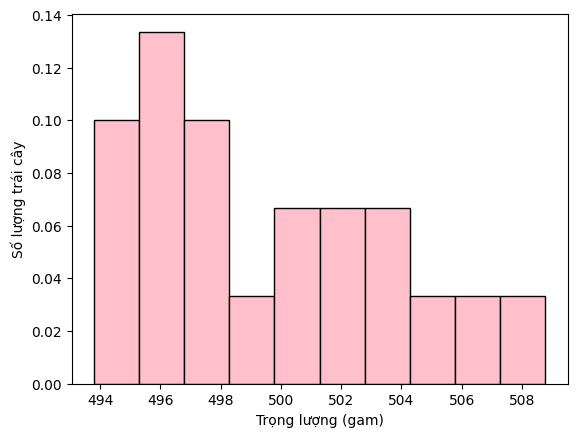

In [69]:
# b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. 
#    Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu 

sam_20 = norm.rvs(mu, sigma, size = 20)
print(pd.Series(data=sam_20, name='').value_counts().sort_index())
# print(sam_20)
plt.hist(sam_20, bins = 10, density = True, edgecolor='black', color='pink')
plt.xlabel("Trọng lượng (gam)")
plt.ylabel("Số lượng trái cây")
plt.show()




In [57]:
mean_20 = np.mean(sam_20)
std_20 = np.std(sam_20)
print(f'Giá trị trung bình : {mean_20 : .4f}')
print(f'Độ lệch chuẩn : {std_20 : .4f}')




Giá trị trung bình :  499.3148
Độ lệch chuẩn :  3.7429



492.346879    1
493.100329    1
494.350785    1
495.948676    1
496.367904    1
497.750850    1
498.122102    1
498.137081    1
498.146329    1
499.063387    1
499.063452    1
499.446943    1
500.967849    1
501.256989    1
501.986857    1
502.170240    1
502.590754    1
503.069739    1
506.092119    1
506.316851    1
Name: count, dtype: int64

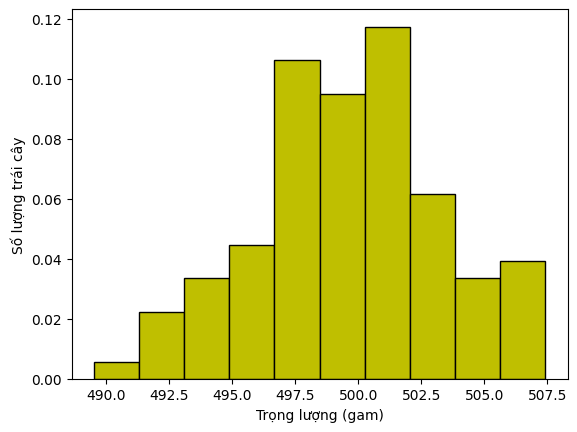

Giá trị trung bình :  499.5846
Độ lệch chuẩn :  3.6145


In [41]:
# c. Bạn hãy mô phỏng lấy 100 trái cây trên. 
#    Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

np.random.seed(42)
sam_100 = norm.rvs(mu, sigma, size = 100)
# print(sam_100)
plt.hist(sam_100, density = True, edgecolor='black', color='y')
plt.xlabel("Trọng lượng (gam)")
plt.ylabel("Số lượng trái cây")
plt.show()

mean_100 = np.mean(sam_100)
std_100 = np.std(sam_100)
print(f'Giá trị trung bình : {mean_100 : .4f}')
print(f'Độ lệch chuẩn : {std_100 : .4f}')


In [14]:
# d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?
print("Độ lệch chuẩn mẫu 20 so với mẫu 100:", std_20 - std_100)
print("Khi bạn thực hiện nhiều lần, bạn có thể nhận thấy rằng độ lệch chuẩn thường giảm khi kích thước mẫu tăng lên. \nĐiều này phản ánh sự ổn định hơn và độ chính xác cao hơn của ước lượng độ lệch chuẩn khi bạn có một mẫu lớn hơn.")

Độ lệch chuẩn mẫu 20 so với mẫu 100: 0.12841512899659469
Khi bạn thực hiện nhiều lần, bạn có thể nhận thấy rằng độ lệch chuẩn thường giảm khi kích thước mẫu tăng lên. 
Điều này phản ánh sự ổn định hơn và độ chính xác cao hơn của ước lượng độ lệch chuẩn khi bạn có một mẫu lớn hơn.


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

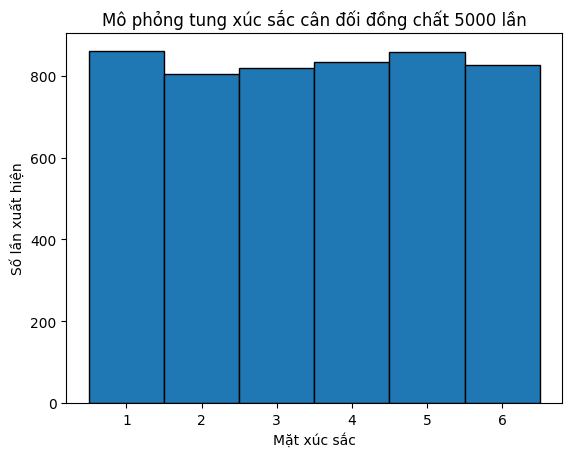

In [15]:
# Mô phỏng 5000 lần tung xúc sắc
n_tosses = 5000
n_faces = 6
toss_results = np.random.randint(1, n_faces + 1, n_tosses)


plt.hist(toss_results, bins= np.arange(0.5, n_faces + 1, 1), edgecolor='black', align='mid')
plt.xlabel("Mặt xúc sắc")
plt.ylabel("Số lần xuất hiện")
plt.title("Mô phỏng tung xúc sắc cân đối đồng chất 5000 lần")
plt.show()

In [16]:
# Lập bảng phân phối tần số thống kế số lượng xuất hiện các mặt xúc sắc
pd.Series(data=toss_results, name='Số lần xuất hiện').value_counts().sort_index()

Số lần xuất hiện
1    860
2    804
3    819
4    833
5    858
6    826
Name: count, dtype: int64

In [35]:
# Dữ liệu số lần xuất hiện của mỗi mặt xúc sắc
frequencies = {
    1: 860,
    2: 804,
    3: 819,
    4: 833,
    5: 858,
    6: 826
}

# Tổng số lần tung
total_tosses = sum(frequencies.values())

# Tính xác suất cho mỗi mặt xúc sắc
probabilities = {face: count / total_tosses for face, count in frequencies.items()}

# Hiển thị xác suất
for face, probability in probabilities.items():
    print(f'Mặt {face}: {probability:.4f}')


Mặt 1: 0.1720
Mặt 2: 0.1608
Mặt 3: 0.1638
Mặt 4: 0.1666
Mặt 5: 0.1716
Mặt 6: 0.1652


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

In [53]:
# a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3
n = 50
p = 0.7
random_numbers = np.random.binomial(n, p, size=5000)
random_numbers

min_value = np.min(random_numbers)
max_value = np.max(random_numbers)
Q1, Q2, Q3 = np.percentile(random_numbers, [20, 50, 75])

print("Min:", min_value)
print("Max:", max_value)
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

Min: 23
Max: 47
Q1: 32.0
Q2: 35.0
Q3: 37.0


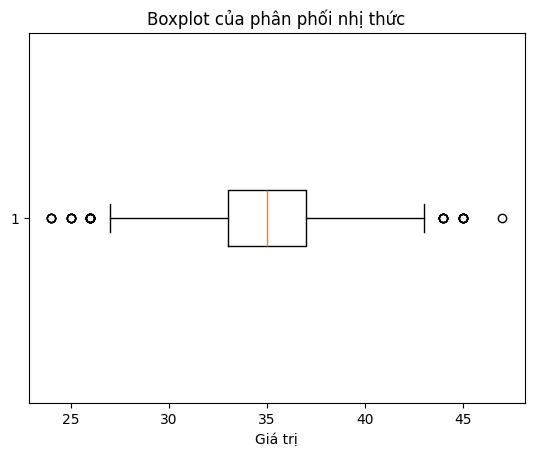

In [19]:
# b. Vẽ đồ thị boxplot
plt.boxplot(random_numbers, vert=False)
plt.title("Boxplot của phân phối nhị thức")
plt.xlabel("Giá trị")
plt.show()

Text(0, 0.5, 'Tần suất')

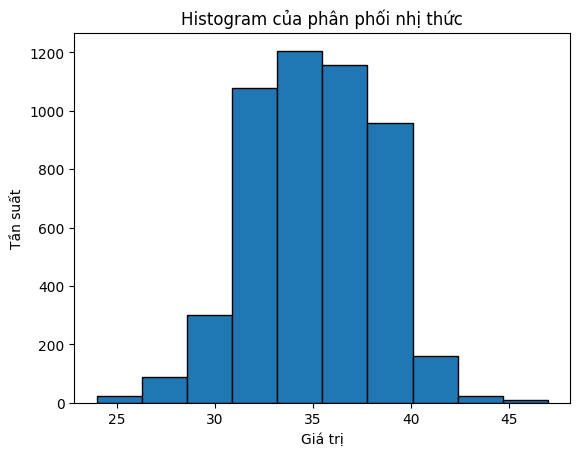

In [52]:
# c. Vẽ các đồ thị: tần số, tần suất
plt.hist(random_numbers, edgecolor='black')
plt.title("Histogram của phân phối nhị thức")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")